In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
x_values = np.random.uniform(0, 1, 500)
y_values = x_values + np.random.normal(1, 0.1, 500)

# learning_rates from 0.01 to 0.1
learning_rates = np.arange(1, 11) * 0.01

df = pd.DataFrame(np.array([x_values, y_values]).T, columns=['x', 'y'])
df['costfunction_y'] = np.ones(len(x_values))
df['derivative_m'] = np.ones(len(x_values))
df['derivative_b'] = np.ones(len(x_values))

df.head()

,x,y,costfunction_y,derivative_m,derivative_b
0,0.153217,1.301884,1.0,1.0,1.0
1,0.074621,1.176853,1.0,1.0,1.0
2,0.216703,1.136176,1.0,1.0,1.0
3,0.100699,1.144016,1.0,1.0,1.0
4,0.724308,1.910713,1.0,1.0,1.0


<AxesSubplot:>

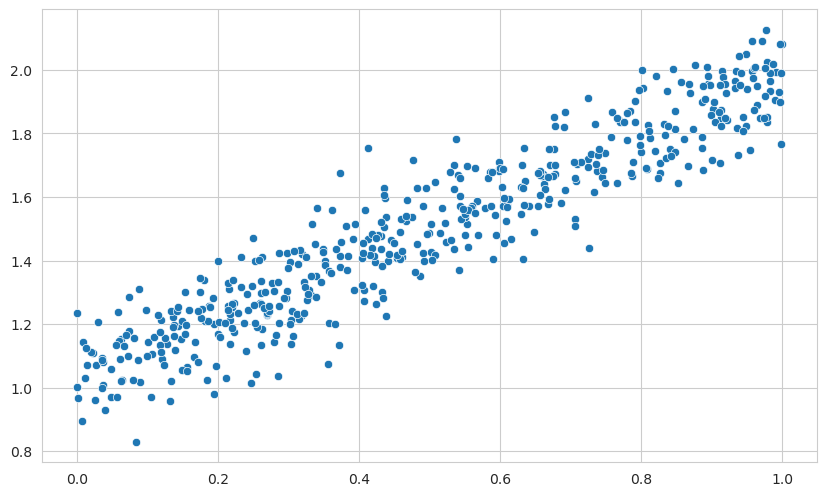

In [7]:
plt.figure(figsize=(10, 6), dpi=100)
sns.scatterplot(data=df, x=x_values, y=y_values)

<AxesSubplot:>

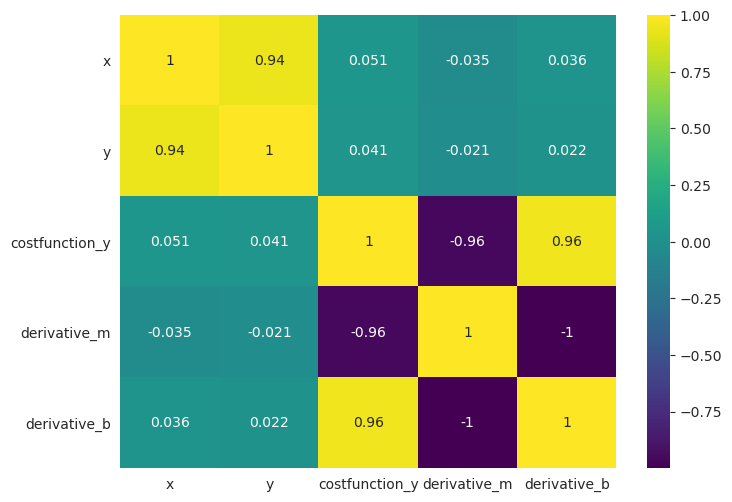

In [17]:
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [18]:
def y_prediction(m, b):
    return m * x_values + b

def costfunction(m, b):
    y_predicted = y_prediction(m, b)
    return np.sqrt(np.mean(y_values - y_predicted))

def update_weights(m, b, x, y, alpha=0.01):
    N = len(x)
    derivative_m = (1 / N) * np.sum(-2 * (y - y_prediction(m, b)))
    derivative_b = (1 / N) * np.sum(-2 * x * (y - y_prediction(m, b)))
    m = m - alpha * derivative_m
    b = b - alpha * derivative_b
    
    return m, b

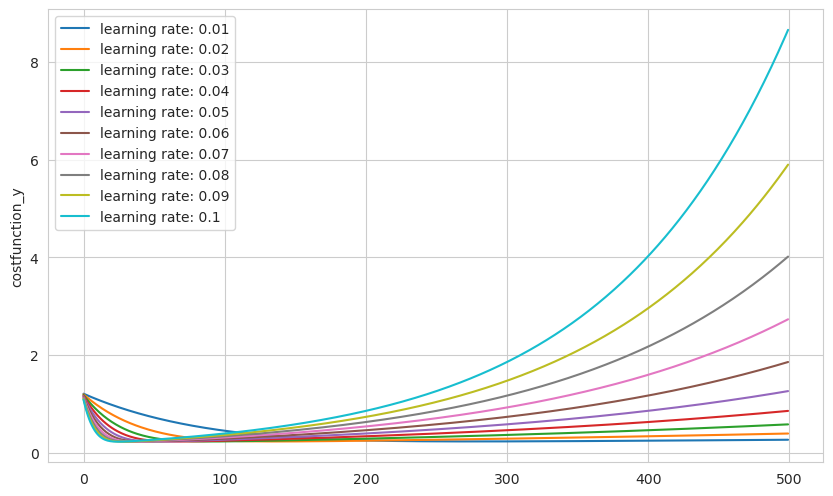

In [23]:
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style('whitegrid')

for i in range(len(learning_rates)):
    m, b = 0, 0
    for j in range(len(df)):
        m, b = update_weights(m, b, x_values, y_values, learning_rates[i])
        df['costfunction_y'].iloc[j] = costfunction(m, b)

    sns.lineplot(data=df, x=np.arange(len(df)), y='costfunction_y', label=f'learning rate: {learning_rates[i]}')
    
plt.legend()

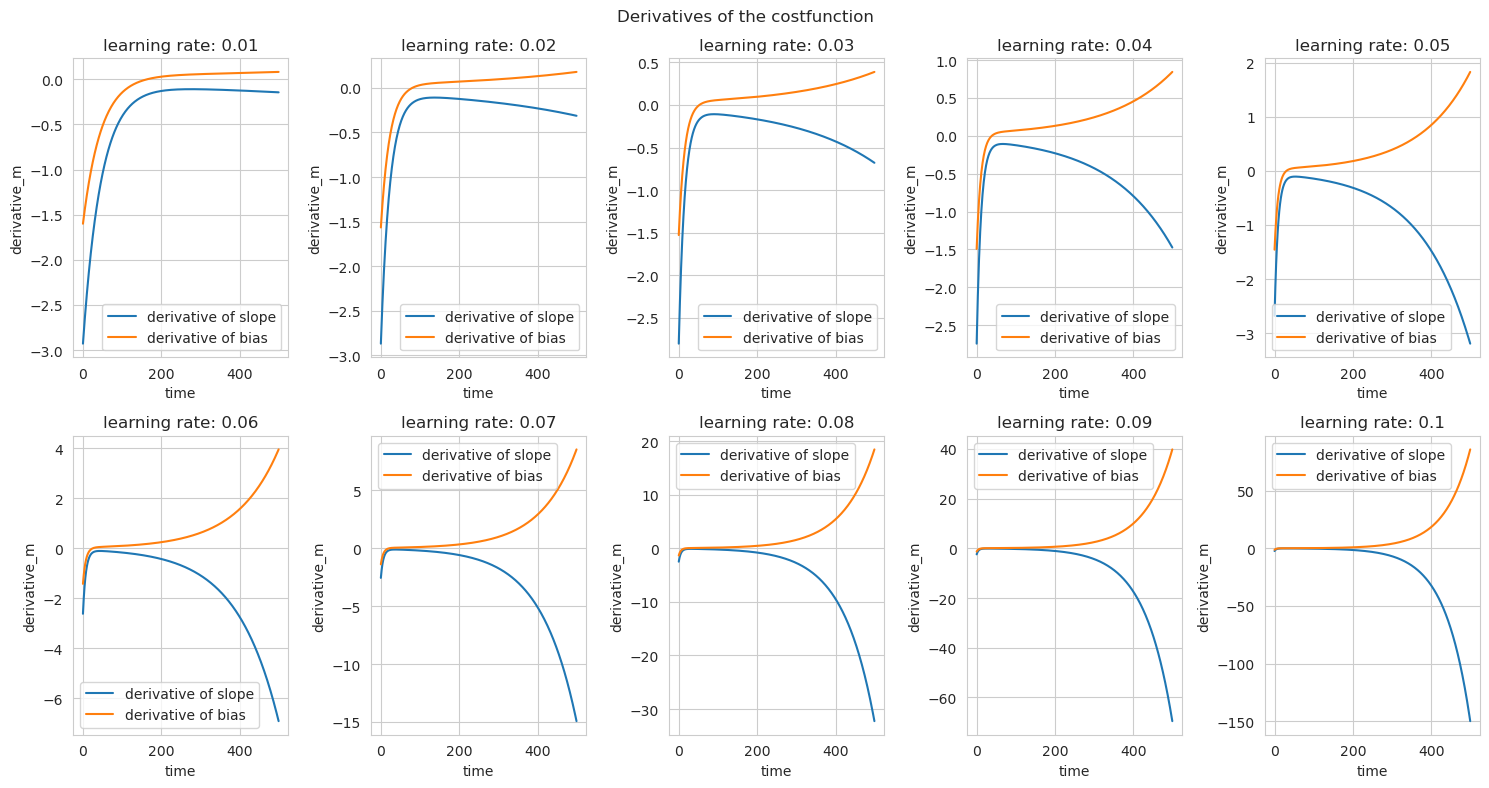

In [24]:
fig, axes = plt.subplots(nrows=2, ncols= 5, figsize=(15, 8), dpi=100)

fig.suptitle('Derivatives of the costfunction')

sns.set_style('whitegrid')

for i in range(len(learning_rates)):
    m, b = 0, 0
    for j in range(len(df)):
        m, b = update_weights(m, b, x_values, y_values, learning_rates[i])
        df['derivative_m'].iloc[j] = (1 / len(y_values)) * np.sum(-2 * (y_values - y_prediction(m, b)))
        df['derivative_b'].iloc[j] = (1 / len(y_values)) * np.sum(-2 * x_values * (y_values - y_prediction(m, b)))

    axes[0 if i < 5 else 1, i % 5].set_xlabel('time')
    axes[0 if i < 5 else 1, i % 5].set_title(f'learning rate: {learning_rates[i]}')
    
    sns.lineplot(data=df, x=np.arange(len(df)), y='derivative_m', ax=axes[0 if i < 5 else 1, i % 5], label='derivative of slope')
    sns.lineplot(data=df, x=np.arange(len(df)), y='derivative_b', ax=axes[0 if i < 5 else 1, i % 5], label='derivative of bias')
    
plt.tight_layout()

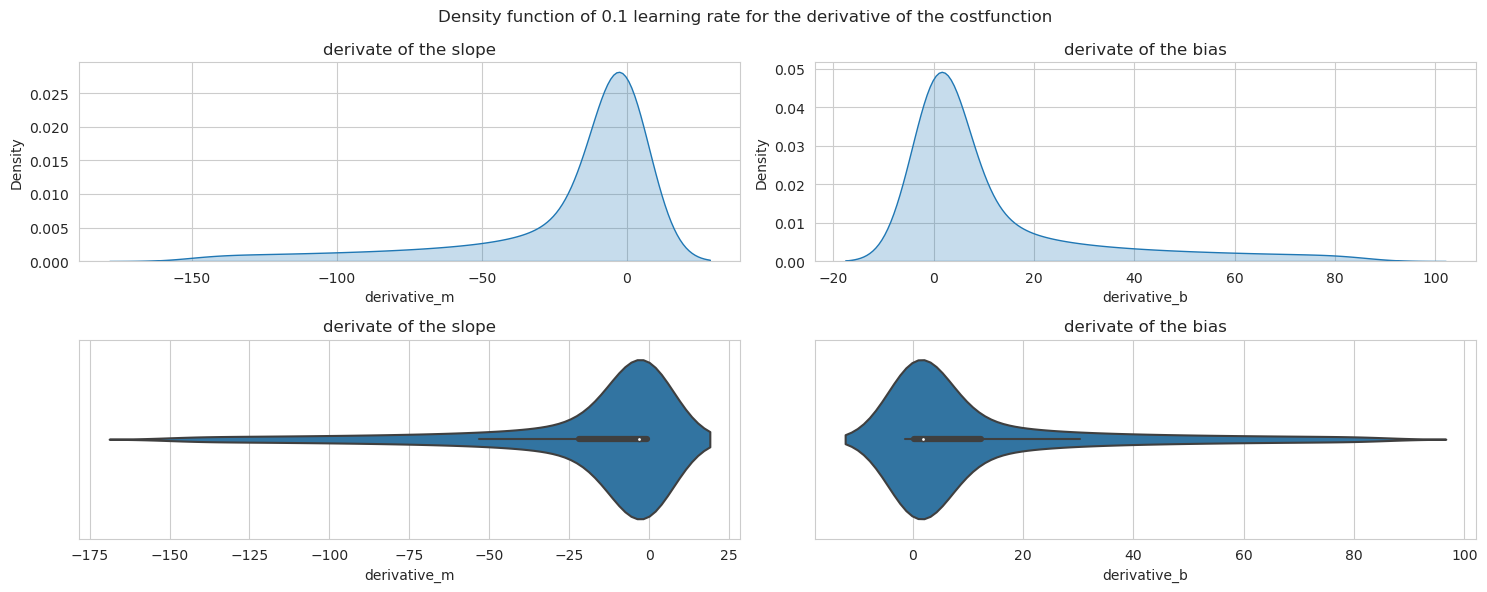

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6), dpi=100)

fig.suptitle('Density function of 0.1 learning rate for the derivative of the costfunction')
axes[0, 0].set_title('derivate of the slope')
axes[0, 1].set_title('derivate of the bias')
axes[1, 0].set_title('derivate of the slope')
axes[1, 1].set_title('derivate of the bias')

sns.kdeplot(data=df, x='derivative_m', ax=axes[0, 0], shade=True)
sns.kdeplot(data=df, x='derivative_b', ax=axes[0, 1], shade=True)

sns.violinplot(data=df, x='derivative_m', ax=axes[1, 0], shade=True)
sns.violinplot(data=df, x='derivative_b', ax=axes[1, 1], shade=True)

plt.tight_layout()